# FDS Assignment 1: UN Debates, World Happiness and International Trade

We can start by loading the data from the available dataset:

In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session " + str(session) + " - " + str(1945 + session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding='utf8')
        if filename[0] == ".":
            continue
        splt = filename.split("_")
        data.append([session, 1945 + session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [2]:
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agniv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agniv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agniv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
def preprocess(speech):
    #tolower
    speech = speech.lower()
    
    #stopwords
    text = word_tokenize(speech)
    tokens_without_sw = [word for word in text if not word in stopwords.words("english")] 
    processed_speech = (" ").join(tokens_without_sw)
    
    #punctuation, indents etc
    processed_speech = processed_speech.translate(str.maketrans('', '', string.punctuation))
    processed_speech = processed_speech.replace("\n"," ")
    processed_speech = processed_speech.replace("\t"," ")
    processed_speech = re.sub('\s*\d+\s*', ' ', processed_speech)
    
    return processed_speech

In [4]:
def yearly_processing(speeches):
    total_speech = ''
    for speech in speeches:
        proc_speech = preprocess(speech)
        total_speech += (' ' + proc_speech)
    
    return total_speech

In [5]:
def iteration(all_years):
    corpus = []
#     for year in all_years:
    for i in range(1970, 2021):
        print(i)
        speeches = yearly_processing(all_years.loc[i]['Speech'])
        corpus.append(speeches)

    return corpus

In [7]:
corpus = iteration(df_speech.set_index(["Year", "ISO-alpha3 Code"]))

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [8]:
print(len(corpus))

51


In [13]:
with open('corpus.txt', 'w', encoding='utf-8') as f:
    f.writelines(corpus)

## TF-IDF

*Tf* means term-frequency while *tf-idf* means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval that has also found good use in document classification. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document (as in the previous example) is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. If needed, more info can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

tf_idf = pd.DataFrame(denselist, columns=feature_names).T
print(tf_idf)

          0    1    2    3    4    5    6    7    8    9   ...   41   42   43  \
aa       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aaa      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aac      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aachen   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
aaf      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
шг       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
ьо       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
қарекет  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
қылмақ   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
ﬂagrant  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

               44   45     

In [15]:
tf_idf.to_csv('tfidf.csv')

In [3]:
tf_idf = pd.read_csv('tfidf.csv')
print(tf_idf)

          word  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  \
0           aa   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1          aaa   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2          aac   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3       aachen   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4          aaf   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
67030       шг   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67031       ьо   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67032  қарекет   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67033   қылмақ   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
67034  ﬂagrant   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

       2011  2012  2013      2014  2015      2016  2017      2018  2019  \


## Word bank

Below is a list of temperature-related words that can be used for our analysis

In [4]:
predictors = [
    'temperature', 'climate', 'weather', 'droughts', 'globalwarming', 'atmosphere', 'ozone', 'ice', 'deforestation', 'heating', 
    'glaciers', 'melting', 'heatwave', 'disaster', 'environment', 'environmental', 'climatologists', 'climatology', 'wildfire', 
    'forestfire', 'solar', 'radiation', 'thermotropic', 'thermal', 'humidity', 'heat'
]

frequencies = [tf_idf[tf_idf['word'] == predictor] for predictor in predictors]
freq_df = pd.concat(frequencies).set_index('word')
print(freq_df)

                   1970      1971      1972      1973      1974      1975  \
word                                                                        
temperature    0.000000  0.000000  0.000000  0.000204  0.000000  0.000000   
climate        0.003367  0.004001  0.008269  0.008888  0.007429  0.005635   
weather        0.000000  0.000121  0.000118  0.000358  0.000665  0.000000   
droughts       0.000000  0.000000  0.000000  0.000803  0.000249  0.000253   
globalwarming  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
atmosphere     0.006173  0.006973  0.010281  0.010576  0.009208  0.009463   
ozone          0.000000  0.000000  0.000000  0.000000  0.000143  0.000000   
ice            0.000000  0.000000  0.000173  0.000000  0.000162  0.000330   
deforestation  0.000000  0.000153  0.000150  0.000000  0.000000  0.000000   
heating        0.000000  0.000000  0.000000  0.000000  0.000210  0.000000   
glaciers       0.000000  0.000000  0.000000  0.000000  0.000000  0.000219   

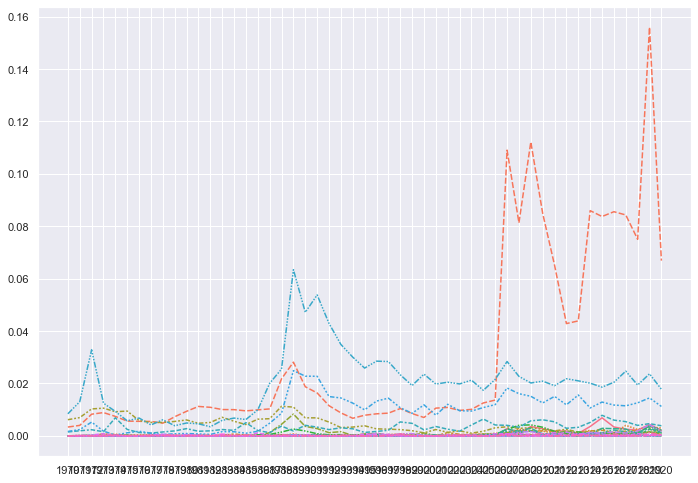

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

freq_df.loc[~(freq_df <= 0.05).all(axis=1)]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=freq_df.T)
plt.legend([],[], frameon=False)

In [6]:
freq_df.sum().median()

0.056082878

<AxesSubplot:>

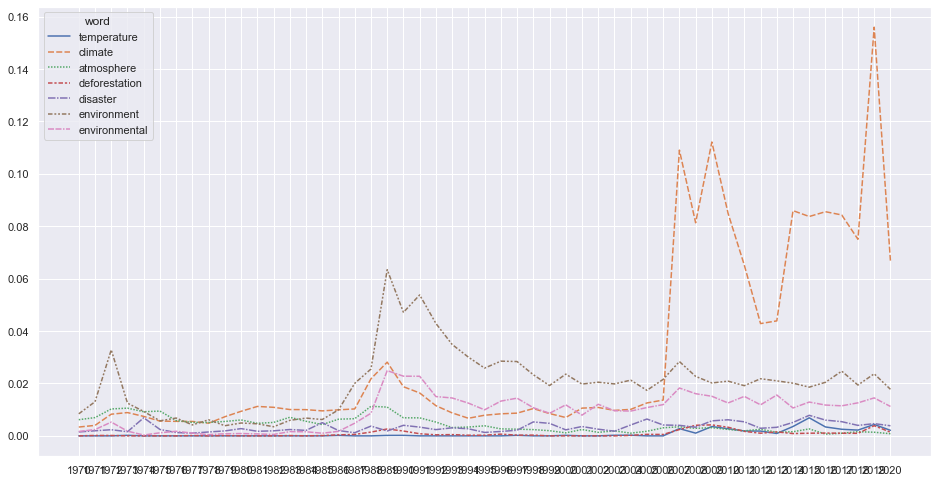

In [10]:
threshold = 0.04
filtered_freq_df = freq_df.loc[(freq_df.sum(axis=1) >= threshold)]

sns.set(rc={'figure.figsize':(16,8.27)})
sns.lineplot(data=filtered_freq_df.T)
# plt.legend([],[], frameon=False)

In [8]:
temperature_df = pd.read_csv('temperature_data.csv').set_index('Year')
print(temperature_df)

      Value
Year       
1970   0.04
1971  -0.02
1972  -0.16
1973   0.34
1974  -0.19
1975   0.14
1976  -0.23
1977   0.25
1978   0.11
1979   0.17
1980   0.31
1981   0.53
1982   0.12
1983   0.50
1984   0.07
1985   0.10
1986   0.30
1987   0.45
1988   0.58
1989   0.37
1990   0.66
1991   0.53
1992   0.25
1993   0.35
1994   0.49
1995   0.78
1996   0.35
1997   0.64
1998   0.98
1999   0.78
2000   0.63
2001   0.85
2002   0.97
2003   0.95
2004   0.82
2005   1.09
2006   0.98
2007   1.13
2008   0.90
2009   0.91
2010   1.15
2011   0.92
2012   0.96
2013   1.03
2014   1.02
2015   1.40
2016   1.52
2017   1.39
2018   1.19
2019   1.40
2020   1.56


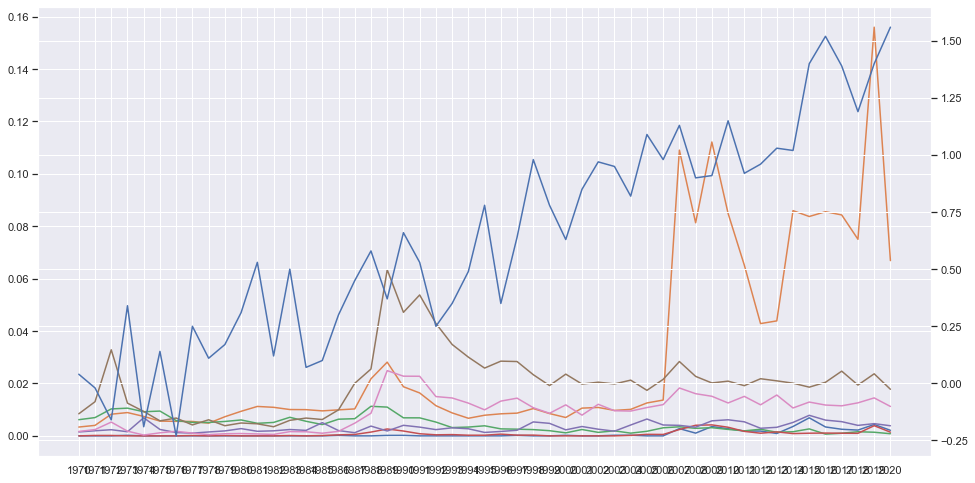

In [12]:
fig, ax = plt.subplots()
ax.plot(filtered_freq_df.T)
ax2 = ax.twinx()
ax2.plot(temperature_df.values)
# temperature_df.plot(legend=False)
# ax.figure.legend()
plt.box(False)
plt.show()

## Exploring Europe

Repeat exploration above for European countries ONLY

In [56]:
countries = ['HUN', 'BGR', 'DNK', 'LUX', 'IRL', 'HRV', 'SWE', 'POL', 'NLD', 'ROU']

def yearly_processing(data):
    filtered = data.reindex(index = countries)
    total_speech = ''
    speeches = filtered['Speech'].dropna()
    for speech in speeches:
        proc_speech = preprocess(speech)
        total_speech += (' ' + proc_speech)
    return total_speech

def iteration(all_years):
    corpus = []
#     for year in all_years:
    for i in range(1970, 2021):
        print(i)
        speeches = yearly_processing(all_years.loc[i])
        corpus.append(speeches)
    return corpus

In [57]:
corpus_europe = iteration(df_speech.set_index(["Year", "ISO-alpha3 Code"]))

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [62]:
print(len(corpus_europe))

51


In [61]:
with open('corpus_europe.txt', 'w', encoding='utf-8') as f:
    f.writelines(corpus_europe)

## TF-IDF again

...

In [63]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_europe)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

tf_idf_eu = pd.DataFrame(denselist, columns=feature_names).T
print(tf_idf_eu)

            0         1         2    3         4    5    6         7   \
ab         0.0  0.000000  0.005822  0.0  0.000000  0.0  0.0  0.000000   
ababa      0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.000000   
abadi      0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.000000   
abandon    0.0  0.002465  0.000000  0.0  0.004956  0.0  0.0  0.004531   
abandoned  0.0  0.000000  0.000000  0.0  0.003366  0.0  0.0  0.003078   
...        ...       ...       ...  ...       ...  ...  ...       ...   
štampar    0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.000000   
еec        0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.000000   
мedya      0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.000000   
оgса       0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.000000   
ьо         0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.000000   

                 8         9   ...        41        42        43        44  \
ab         0.000000  0.000000  ...  0.000000 

In [64]:
tf_idf_eu.to_csv('tfidf_eu.csv')

In [74]:
tf_idf_eu = pd.read_csv('tfidf_eu.csv')
print(tf_idf_eu)

            word  1970      1971      1972  1973      1974  1975  1976  \
0             ab   0.0  0.000000  0.005822   0.0  0.000000   0.0   0.0   
1          ababa   0.0  0.000000  0.000000   0.0  0.000000   0.0   0.0   
2          abadi   0.0  0.000000  0.000000   0.0  0.000000   0.0   0.0   
3        abandon   0.0  0.002465  0.000000   0.0  0.004956   0.0   0.0   
4      abandoned   0.0  0.000000  0.000000   0.0  0.003366   0.0   0.0   
...          ...   ...       ...       ...   ...       ...   ...   ...   
19017    štampar   0.0  0.000000  0.000000   0.0  0.000000   0.0   0.0   
19018        еec   0.0  0.000000  0.000000   0.0  0.000000   0.0   0.0   
19019      мedya   0.0  0.000000  0.000000   0.0  0.000000   0.0   0.0   
19020       оgса   0.0  0.000000  0.000000   0.0  0.000000   0.0   0.0   
19021         ьо   0.0  0.000000  0.000000   0.0  0.000000   0.0   0.0   

           1977      1978  ...      2011      2012      2013      2014  \
0      0.000000  0.000000  ...  0.000

In [75]:
predictors = [
    'temperature', 'climate', 'weather', 'droughts', 'globalwarming', 'atmosphere', 'ozone', 'ice', 'deforestation', 'heating', 
    'glaciers', 'melting', 'heatwave', 'disaster', 'environment', 'environmental', 'climatologists', 'climatology', 'wildfire', 
    'forestfire', 'solar', 'radiation', 'thermotropic', 'thermal', 'humidity', 'heat'
]

frequencies_eu = [tf_idf_eu[tf_idf_eu['word'] == predictor] for predictor in predictors]
freq_df_eu = pd.concat(frequencies_eu).set_index('word')
print(freq_df_eu)

                   1970      1971      1972      1973      1974      1975  \
word                                                                        
temperature    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
climate        0.027937  0.013841  0.013938  0.006304  0.005565  0.006981   
weather        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
droughts       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
atmosphere     0.000000  0.013826  0.007956  0.010796  0.015882  0.019924   
ozone          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ice            0.000000  0.000000  0.000000  0.000000  0.003758  0.000000   
deforestation  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
heating        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
glaciers       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
melting        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

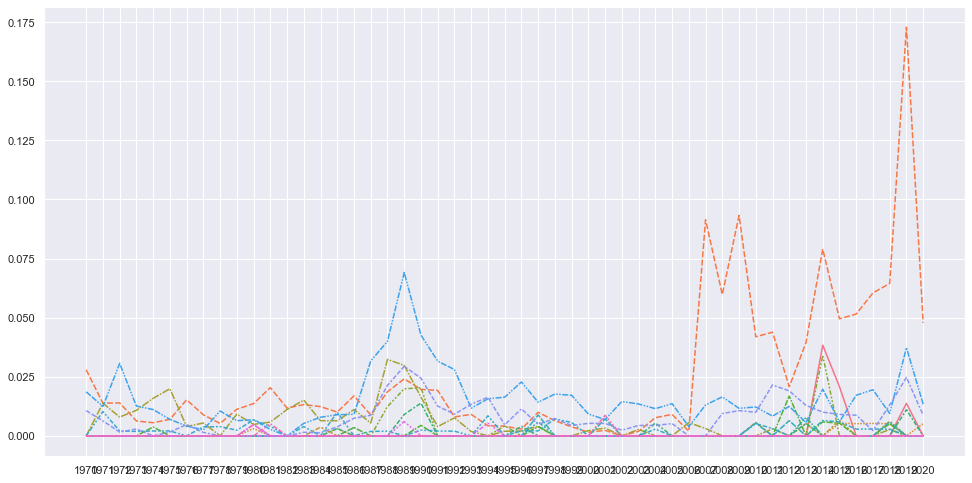

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

freq_df_eu.loc[~(freq_df_eu <= 0.05).all(axis=1)]

sns.set(rc = {'figure.figsize':(16.5,8.27)})
sns.lineplot(data = freq_df_eu.T)
plt.legend([],[], frameon = False)

<AxesSubplot:>

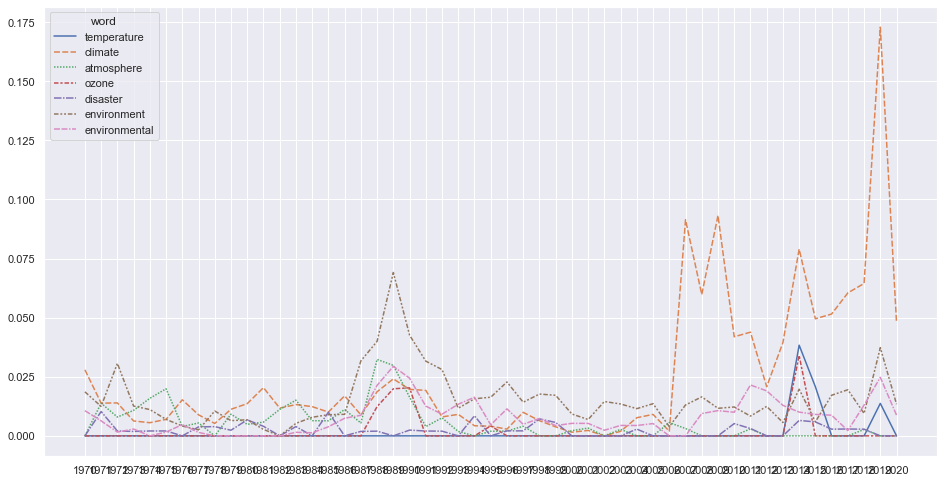

In [79]:
threshold = 0.06
filtered_freq_df_eu = freq_df_eu.loc[(freq_df_eu.sum(axis=1) >= threshold)]

sns.set(rc={'figure.figsize': (16,8.27)})
sns.lineplot(data=filtered_freq_df_eu.T)

In [91]:
temperature_df_eu = pd.read_excel('Europe_temp_data.xlsx').set_index('Year')
temperature_df_eu

,Temperature change
Year,
1970,0.26
1971,0.30
1972,0.51
1973,0.29
1974,0.79
1975,1.06
1976,-0.28
1977,0.37
1978,-0.24


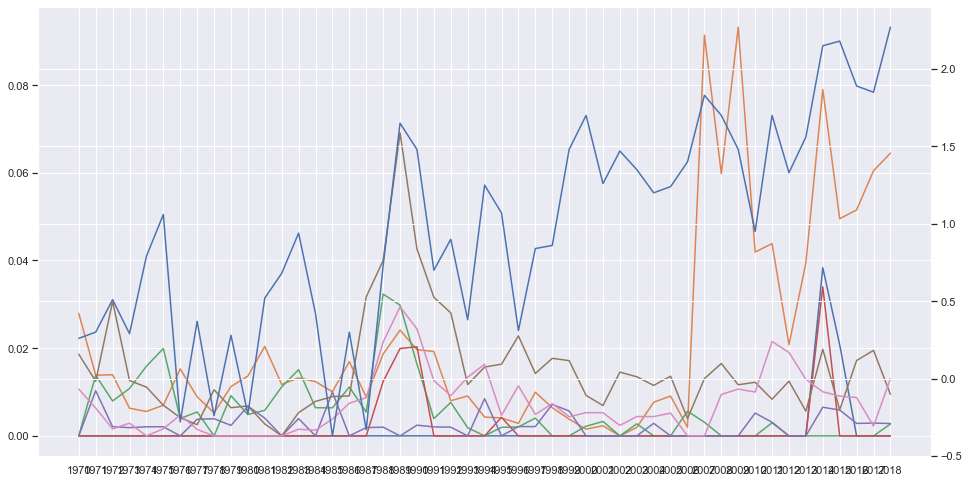

In [94]:
fig, ax = plt.subplots()
ax.plot(filtered_freq_df_eu.T[:-2])
ax2 = ax.twinx()
ax2.plot(temperature_df_eu.values)
# temperature_df.plot(legend=False)
# ax.figure.legend()
plt.box(False)
plt.show()

## Exploring renewable energy share in Europe

Make the corpus again for the following European countries:

In [110]:
countries = ['HUN', 'BGR', 'DNK', 'LUX', 'IRL', 'HRV', 'SWE', 'POL', 'NLD', 'ROU']

def yearly_processing(speeches):
    total_speech = ''
    for speech in speeches:
        proc_speech = preprocess(speech)
        total_speech += (' ' + proc_speech)
    return total_speech

def iteration(data, countries):
    corpus = []
#     for year in all_years:
    for country in countries:
        print(country)
        speeches = yearly_processing(data.loc[country]['Speech'])
        corpus.append(speeches)
    return corpus

In [111]:
corpus_countries = iteration(df_speech.set_index(['ISO-alpha3 Code', 'Year']), countries)

HUN
BGR
DNK
LUX
IRL
HRV
SWE
POL
NLD
ROU


In [115]:
with open('corpus_countries.txt', 'w', encoding='utf-8') as f:
    f.writelines(corpus_countries)

In [116]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_countries)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

tf_idf_countries = pd.DataFrame(denselist, columns=feature_names).T
print(tf_idf_countries)

                  0         1         2         3         4         5  \
ab         0.000000  0.000889  0.000000  0.000000  0.000000  0.000000   
ababa      0.000000  0.000528  0.000000  0.002323  0.000000  0.002649   
abadi      0.000000  0.000889  0.000000  0.000000  0.000000  0.000000   
abandon    0.000370  0.000657  0.000339  0.002531  0.001835  0.000550   
abandoned  0.001782  0.001055  0.000000  0.000581  0.001105  0.000000   
...             ...       ...       ...       ...       ...       ...   
štampar    0.000000  0.000000  0.000000  0.000000  0.000000  0.005947   
еec        0.001000  0.000000  0.000000  0.000000  0.000000  0.000000   
мedya      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
оgса       0.000000  0.000000  0.000000  0.000978  0.000000  0.000000   
ьо         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  6         7         8         9  
ab         0.000000  0.000000  0.000000  0.000000  
ababa      0.000512

In [117]:
tf_idf_countries.to_csv('tfidf_countries.csv')

In [118]:
tf_idf_countries = pd.read_csv('tfidf_countries.csv')
tf_idf_countries

,word,HUN,BGR,DNK,LUX,IRL,HRV,SWE,POL,NLD,ROU
0,ab,0.000000,0.000889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ababa,0.000000,0.000528,0.000000,0.002323,0.000000,0.002649,0.000512,0.000497,0.000000,0.000000
2,abadi,0.000000,0.000889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,abandon,0.000370,0.000657,0.000339,0.002531,0.001835,0.000550,0.001911,0.000310,0.000309,0.000518
4,abandoned,0.001782,0.001055,0.000000,0.000581,0.001105,0.000000,0.002558,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
19017,štampar,0.000000,0.000000,0.000000,0.000000,0.000000,0.005947,0.000000,0.000000,0.000000,0.000000
19018,еec,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19019,мedya,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001671,0.000000
19020,оgса,0.000000,0.000000,0.000000,0.000978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [119]:
frequencies_countries = [tf_idf_countries[tf_idf_countries['word'] == predictor] for predictor in predictors]
freq_df_countries = pd.concat(frequencies_countries).set_index('word')
print(freq_df_countries)

                    HUN       BGR       DNK       LUX       IRL       HRV  \
word                                                                        
temperature    0.002969  0.000528  0.000000  0.000000  0.000000  0.000883   
climate        0.011462  0.019710  0.034257  0.036876  0.017894  0.019240   
weather        0.000537  0.000000  0.000000  0.000525  0.000000  0.000000   
droughts       0.000661  0.000000  0.000607  0.000647  0.000000  0.000000   
atmosphere     0.015160  0.007227  0.005088  0.003254  0.002065  0.002199   
ozone          0.002684  0.000000  0.000492  0.002625  0.000333  0.000000   
ice            0.000000  0.001055  0.000545  0.000000  0.000000  0.001766   
deforestation  0.000000  0.000000  0.003640  0.000647  0.000000  0.000000   
heating        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
glaciers       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
melting        0.000000  0.000000  0.000545  0.000000  0.000368  0.000883   

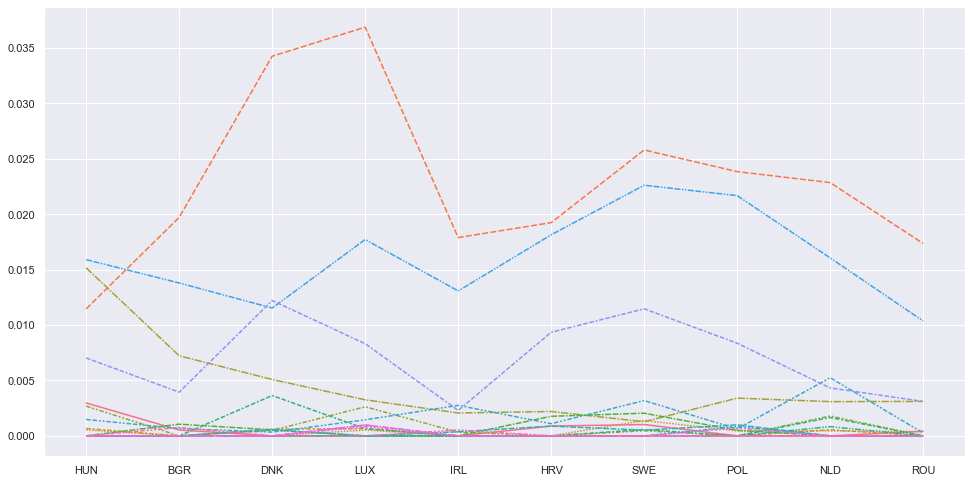

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

freq_df_countries.loc[~(freq_df_countries <= 0.05).all(axis=1)]

sns.set(rc = {'figure.figsize':(16.5,8.27)})
sns.lineplot(data = freq_df_countries.T)
plt.legend([],[], frameon = False)

<AxesSubplot:>

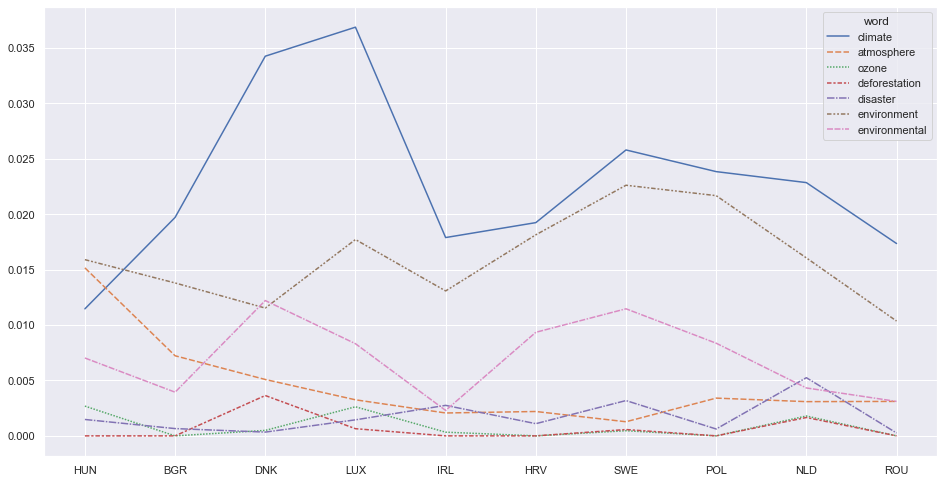

In [126]:
threshold = 0.006
filtered_freq_df_countries = freq_df_countries.loc[(freq_df_countries.sum(axis=1) >= threshold)]

sns.set(rc={'figure.figsize': (16,8.27)})
sns.lineplot(data=filtered_freq_df_countries.T)

In [129]:
renewable_energy_df = pd.read_excel("ren_energy_europe.xlsx").set_index('ISO-alpha3 Code')
renewable_energy_df

,Value
ISO-alpha3 Code,
HUN,62.114794
BGR,219.962653
DNK,419.166236
LUX,300.435134
IRL,229.562500
HRV,612.046559
SWE,1725.996403
POL,90.562023
NLD,85.512498


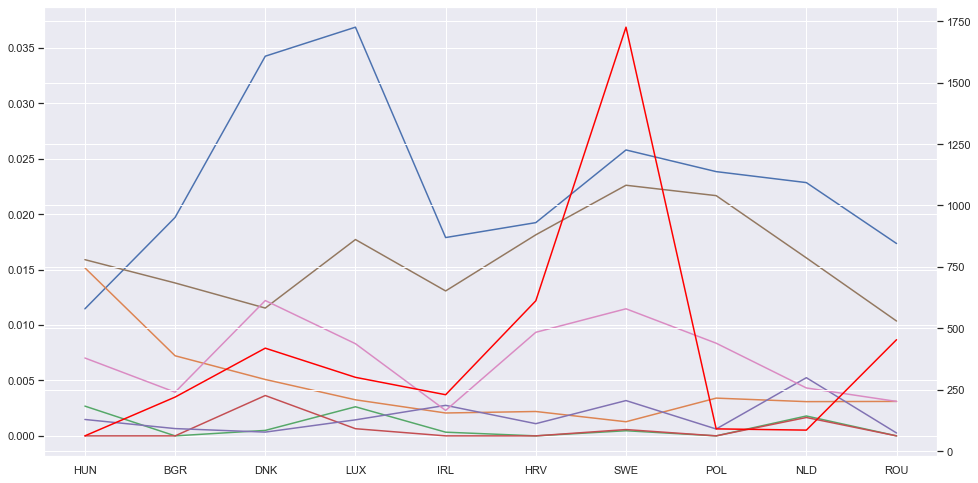

In [133]:
fig, ax = plt.subplots()
ax.plot(filtered_freq_df_countries.T)
ax2 = ax.twinx()
ax2.plot(renewable_energy_df.values, color='red')
# temperature_df.plot(legend=False)
# ax.figure.legend()
plt.box(False)
plt.show()

## Classification (Renewable Energy)

We will try to classify countries based on their renewable energy ranking (using tf-idf frequencies of climate change-related words):

In [10]:
countries = [
    'ISL', 'NOR', 'SWE', 'BRA', 'NZL', 'DNK', 'AUT', 'CHE', 'FIN', 'COL', 'PRT', 'ECU', 'CAN', 'VEN', 'HRV', 'PER', 'CHL', 'LVA', 
    'VNM', 'ESP', 'IRL', 'ROU', 'TUR', 'CHN', 'FRA', 'AUS', 'NLD', 'BGR', 'GBR', 'JPN', 'ARG', 'USA', 'PAK', 'IND', 'IRN', 'SGP', 
    'SAU', 'ZAF', 'ISR', 'EGY', 'HUN', 'LUX', 'THA', 'POL', 'MAR'
]

def yearly_processing(speeches):
    total_speech = ''
    for speech in speeches:
        proc_speech = preprocess(speech)
        total_speech += (' ' + proc_speech)
    return total_speech

def iteration(data, countries):
    corpus = []
#     for year in all_years:
    for country in countries:
        print(country)
        speeches = yearly_processing(data.loc[country]['Speech'])
        corpus.append(speeches)
    return corpus

corpus_countries = iteration(df_speech.set_index(['ISO-alpha3 Code', 'Year']), countries)

ISL
NOR
SWE
BRA
NZL
DNK
AUT
CHE
FIN
COL
PRT
ECU
CAN
VEN
HRV
PER
CHL
LVA
VNM
ESP
IRL
ROU
TUR
CHN
FRA
AUS
NLD
BGR
GBR
JPN
ARG
USA
PAK
IND
IRN
SGP
SAU
ZAF
ISR
EGY
HUN
LUX
THA
POL
MAR


In [11]:
with open('corpus_countries.txt', 'w', encoding='utf-8') as f:
    f.writelines(corpus_countries)

In [12]:
## Generate TF-IDF again
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_countries)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

tf_idf_countries = pd.DataFrame(denselist, columns=feature_names).T
print(tf_idf_countries)

              0         1         2         3    4    5         6    7    8   \
ab      0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
ababa   0.000657  0.001960  0.000544  0.000000  0.0  0.0  0.001021  0.0  0.0   
abacc   0.000000  0.000000  0.000000  0.001338  0.0  0.0  0.000000  0.0  0.0   
aback   0.000000  0.000000  0.000000  0.001338  0.0  0.0  0.000000  0.0  0.0   
abadan  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
...          ...       ...       ...       ...  ...  ...       ...  ...  ...   
есе     0.000000  0.002878  0.000000  0.000000  0.0  0.0  0.002249  0.0  0.0   
мedya   0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
оgса    0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
рlo     0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
ьо      0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   

         9   ...        35        36   

In [13]:
tf_idf_countries.to_csv('tfidf_countries.csv')

In [3]:
tf_idf_countries = pd.read_csv('tfidf_countries.csv')
tf_idf_countries

,word,ISL,NOR,SWE,BRA,NZL,DNK,AUT,CHE,FIN,...,SGP,SAU,ZAF,ISR,EGY,HUN,LUX,THA,POL,MAR
0,ab,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
1,ababa,0.000657,0.001960,0.000544,0.000000,0.0,0.0,0.001021,0.0,0.0,...,0.000644,0.000665,0.001072,0.0,0.001292,0.0,0.002435,0.000498,0.000514,0.00274
2,abacc,0.000000,0.000000,0.000000,0.001338,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
3,aback,0.000000,0.000000,0.000000,0.001338,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
4,abadan,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38914,есе,0.000000,0.002878,0.000000,0.000000,0.0,0.0,0.002249,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
38915,мedya,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
38916,оgса,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.001487,0.000000,0.000000,0.00000
38917,рlo,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000


In [5]:
frequencies_countries = [tf_idf_countries[tf_idf_countries['word'] == predictor] for predictor in predictors]
freq_df_countries = pd.concat(frequencies_countries).set_index('word')
print(freq_df_countries)

                    ISL       NOR       SWE       BRA       NZL       DNK  \
word                                                                        
temperature    0.000000  0.001540  0.001282  0.001291  0.001151  0.000000   
climate        0.032229  0.033182  0.026017  0.018122  0.022782  0.033504   
weather        0.000567  0.000564  0.001408  0.000473  0.001686  0.000000   
droughts       0.000753  0.000000  0.000000  0.000000  0.000000  0.000643   
atmosphere     0.003572  0.003155  0.001313  0.004961  0.004126  0.005085   
ozone          0.004166  0.001183  0.000492  0.000496  0.002652  0.000508   
ice            0.011177  0.001587  0.002642  0.000000  0.000000  0.000682   
deforestation  0.001972  0.007839  0.000544  0.007123  0.000488  0.003370   
heating        0.005896  0.000000  0.000000  0.000000  0.000000  0.000000   
glaciers       0.003516  0.000000  0.000000  0.000000  0.000000  0.000000   
melting        0.004487  0.000637  0.000530  0.000534  0.000000  0.000548   

In [27]:
renewable_energy_df = pd.read_csv("ren_energy_avg.csv").set_index('Country')
renewable_energy_df

,Value
Country,
ISL,65.149788
NOR,68.130331
SWE,33.843067
BRA,40.299046
NZL,39.450484
DNK,8.218946
AUT,29.753793
CHE,30.778169
FIN,18.233530


<AxesSubplot:>

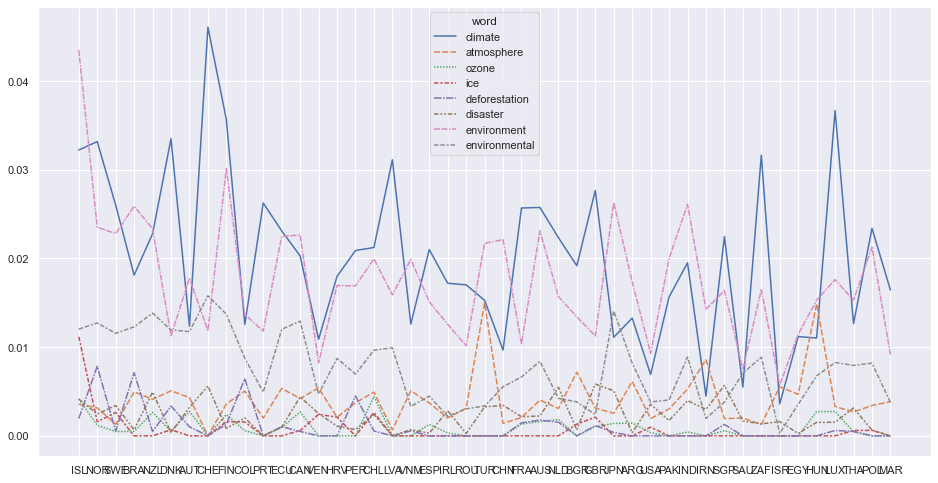

In [28]:
import seaborn as sns

threshold = 0.03
filtered_freq_df_countries = freq_df_countries.loc[(freq_df_countries.sum(axis=1) >= threshold)]

sns.set(rc={'figure.figsize': (16,8.27)})
sns.lineplot(data=filtered_freq_df_countries.T)

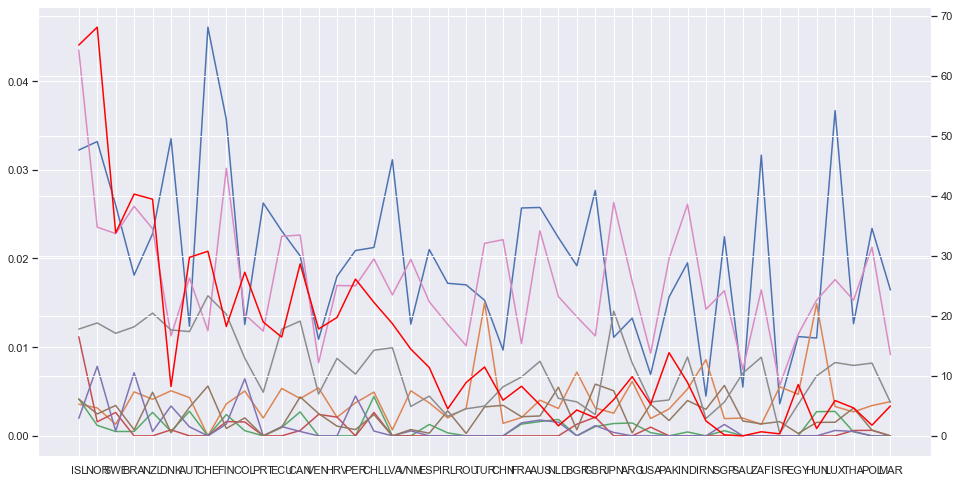

In [29]:
fig, ax = plt.subplots()
ax.plot(filtered_freq_df_countries.T)
ax2 = ax.twinx()
ax2.plot(renewable_energy_df.values, color='red')
# temperature_df.plot(legend=False)
# ax.figure.legend()
plt.box(False)
plt.show()

In [33]:
import numpy as np
data = sorted(renewable_energy_df.values)
q3, q1 = np.percentile(data, [75 ,25])
median = np.median(data)
print(q1)
print(median)
print(q3)

4.66702169
8.909122737
19.743437399999998


In [35]:
categories = ['Below Average', 'Above Average']

renewable_energy_df['Category'] = renewable_energy_df['Value'].apply(
    lambda x: 0 if x <= median else 1
)
renewable_energy_df

,Value,Category
Country,,
ISL,65.149788,1
NOR,68.130331,1
SWE,33.843067,1
BRA,40.299046,1
NZL,39.450484,1
DNK,8.218946,0
AUT,29.753793,1
CHE,30.778169,1
FIN,18.233530,1


In [38]:
from sklearn.model_selection import train_test_split

X = freq_df_countries.T.values
Y = renewable_energy_df['Category'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [39]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=10)
clf = model.fit(x_train, y_train)

predictions = clf.predict(x_test)
# print(predictions)
# print(y_test)
accuracy = np.mean(predictions == y_test)
print("The accuracy of our model: ", accuracy)

The accuracy of our model:  0.42857142857142855
